### Description of datasets

channels: This dataset contains information about the sales channels (marketplaces) where our store owners sell their goods and food.

deliveries: This dataset contains information about the deliveries made by our partner delivery drivers.

drivers: This dataset contains information about the partner delivery drivers. They are stationed at our hubs, and every time an order is processed, they make the deliveries to the consumers' homes.

hubs: This dataset contains information about the Delivery Center hubs. Hubs are the distribution centers for 
orders, and deliveries originate from there.

orders: This dataset contains information about the sales processed through the Delivery Center platform.

payments: This dataset contains information about the payments made to the Delivery Center.

stores: This dataset contains information about the store owners. They use the Delivery Center platform to sell their items (goods and/or food) on the marketplaces.### 

In [3]:
pip install pyspark

  Using cached pyspark-3.5.1-py2.py3-none-any.whl
  Obtaining dependency information for py4j==0.10.9.7 from https://files.pythonhosted.org/packages/10/30/a58b32568f1623aaad7db22aa9eafc4c6c194b429ff35bdc55ca2726da47/py4j-0.10.9.7-py2.py3-none-any.whl.metadata
  Using cached py4j-0.10.9.7-py2.py3-none-any.whl.metadata (1.5 kB)
Using cached py4j-0.10.9.7-py2.py3-none-any.whl (200 kB)

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType
from pyspark.sql import functions as F

In [5]:
spark = SparkSession.builder.appName("hdfs_test").config("spark.sql.execution.arrow.pyspark.enabled", "true").getOrCreate()

24/04/24 10:48:23 WARN Utils: Your hostname, MacBook-Air-Paulina.local resolves to a loopback address: 127.0.0.1; using 192.168.33.5 instead (on interface en0)
24/04/24 10:48:23 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/24 10:48:24 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [7]:
files = ['channels', 'deliveries', 'drivers', 'hubs', 'orders', 'payments', 'stores']
dfs = {}

for file in files:
    dfs[file] = spark.read.csv("hdfs://localhost:9000/user/maciek/"+file+".csv", header=True, inferSchema=True)

24/04/24 10:48:30 WARN SQLConf: The SQL config 'spark.sql.execution.arrow.enabled' has been deprecated in Spark v3.0 and may be removed in the future. Use 'spark.sql.execution.arrow.pyspark.enabled' instead of it.
24/04/24 10:48:30 WARN SQLConf: The SQL config 'spark.sql.execution.arrow.enabled' has been deprecated in Spark v3.0 and may be removed in the future. Use 'spark.sql.execution.arrow.pyspark.enabled' instead of it.
24/04/24 10:48:30 WARN SQLConf: The SQL config 'spark.sql.execution.arrow.enabled' has been deprecated in Spark v3.0 and may be removed in the future. Use 'spark.sql.execution.arrow.pyspark.enabled' instead of it.
24/04/24 10:48:30 WARN SQLConf: The SQL config 'spark.sql.execution.arrow.enabled' has been deprecated in Spark v3.0 and may be removed in the future. Use 'spark.sql.execution.arrow.pyspark.enabled' instead of it.
24/04/24 10:48:30 WARN SQLConf: The SQL config 'spark.sql.execution.arrow.enabled' has been deprecated in Spark v3.0 and may be removed in the f

In [8]:
channels = dfs['channels']

In [9]:
channels.show()

+----------+--------------+------------+
|channel_id|  channel_name|channel_type|
+----------+--------------+------------+
|         1|   OTHER PLACE| OWN CHANNEL|
|         2|   PHONE PLACE| OWN CHANNEL|
|         3|   WHATS PLACE| OWN CHANNEL|
|         4|    FACE PLACE| OWN CHANNEL|
|         5|    FOOD PLACE| MARKETPLACE|
|         6|   STORE PLACE| OWN CHANNEL|
|         7|  BERLIN PLACE| OWN CHANNEL|
|         8|  MADRID PLACE| OWN CHANNEL|
|         9|   THINK PLACE| OWN CHANNEL|
|        10|  LISBON PLACE| OWN CHANNEL|
|        11|   SUPER PLACE| OWN CHANNEL|
|        12|     ALL PLACE| MARKETPLACE|
|        13|VELOCITY PLACE| MARKETPLACE|
|        15|    EATS PLACE| MARKETPLACE|
|        17|   SHOPP PLACE| MARKETPLACE|
|        20|  MUNICH PLACE| MARKETPLACE|
|        21|  LONDON PLACE| MARKETPLACE|
|        23|  ATCHIN PLACE| MARKETPLACE|
|        24|    FULL PLACE| MARKETPLACE|
|        25|      ON PLACE| MARKETPLACE|
+----------+--------------+------------+
only showing top

In [10]:
from pyspark.sql import functions as F


print(f"channel_name number: {channels.select('channel_name').distinct().count()}\n")

### unique values occurance 
grouped_data = channels.groupBy('channel_name').agg(F.count('*').alias('count'))
print(f"unique values in channel name column: {grouped_data.count()}\n")

### null values number for each value in channel name
nul_vals_cn = channels.groupBy('channel_name').agg(F.sum(F.col('channel_name').isNull().cast("int")).alias("null_count")).collect()
for row in nul_vals_cn:
    print(f"{row['channel_name']} null values: {row['null_count']}")

### total null values number in each column
tot_nan_vals = channels.select(*(F.sum(F.col(c).isNull().cast("int")).alias(c) for c in channels.columns)).collect()[0].asDict()
print(f"\nnumber of unique values in each column:\n {tot_nan_vals}")


channel_name number: 40

unique values in channel name column: 40

FOOD PLACE null values: 0
FACE PLACE null values: 0
LONGO PLACE null values: 0
CENTER PLACE null values: 0
ALL PLACE null values: 0
RONALD PLACE null values: 0
FULL PLACE null values: 0
PORTO PLACE null values: 0
SUPER PLACE null values: 0
VELOCITY PLACE null values: 0
AHORA PLACE null values: 0
SEARCH PLACE null values: 0
GLUB PLACE null values: 0
CAICAI PLACE null values: 0
OTHER PLACE null values: 0
BERLIN PLACE null values: 0
BEATLES PLACE null values: 0
ON PLACE null values: 0
SPEED PLACE null values: 0
LONDON PLACE null values: 0
WEAR PLACE null values: 0
SAN PLACE null values: 0
LISBON PLACE null values: 0
SHOPP PLACE null values: 0
RIBA PLACE null values: 0
STORE PLACE null values: 0
MUNICH PLACE null values: 0
REGISTER PLACE null values: 0
OWN PLACE null values: 0
MADRID PLACE null values: 0
THINK PLACE null values: 0
EATS PLACE null values: 0
ATCHIN PLACE null values: 0
OFF PLACE null values: 0
BRAZIL PLACE nu

In [11]:
deliveries = dfs['deliveries']

In [12]:
print(deliveries.describe().show())
deliveries.show()

24/04/24 10:48:32 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+-----------------+-------------------+------------------+------------------------+---------------+
|summary|      delivery_id|  delivery_order_id|         driver_id|delivery_distance_meters|delivery_status|
+-------+-----------------+-------------------+------------------+------------------------+---------------+
|  count|           378843|             378843|            362957|                  378770|         378843|
|   mean| 2634216.36283896|8.220422339218093E7| 21001.77764308169|      10721.360044354093|           NULL|
| stddev|264655.3209144291|  6996909.141038616|15520.652243004235|       231539.1894589949|           NULL|
|    min|          2174658|           68409030|               133|                       0|      CANCELLED|
|    max|          3144739|           93139817|             66459|                 7251291|     DELIVERING|
+-------+-----------------+-------------------+------------------+------------------------+---------------+

None
+-----------+---------

In [13]:
print(f"delivery status distinct number: {deliveries.select('delivery_status').distinct().count()}\n")

### unique values occurance 
grouped_data = deliveries.groupBy('delivery_status').agg(F.count('*').alias('count'))
print(f"unique values in delivery status column: {grouped_data.count()}\n")

### total null values number in each column
tot_nan_vals = deliveries.select(*(F.sum(F.col(c).isNull().cast("int")).alias(c) for c in deliveries.columns)).collect()[0].asDict()
print(type(tot_nan_vals))
for key, val in tot_nan_vals.items():
   print(f"number of null values in  column {key}: {val}\n")


delivery status distinct number: 3

unique values in delivery status column: 3

<class 'dict'>
number of null values in  column delivery_id: 0

number of null values in  column delivery_order_id: 0

number of null values in  column driver_id: 15886

number of null values in  column delivery_distance_meters: 73

number of null values in  column delivery_status: 0



In [14]:
hubs = dfs['hubs']

In [15]:
print(hubs.describe().show())
hubs.show(32)

CodeCache: size=131072Kb used=39049Kb max_used=39083Kb free=92023Kb
 bounds [0x00000001061e8000, 0x0000000108858000, 0x000000010e1e8000]
 total_blobs=14336 nmethods=13332 adapters=915
 compilation: disabled (not enough contiguous free space left)


Java HotSpot(TM) 64-Bit Server VM warning: CodeCache is full. Compiler has been disabled.
Java HotSpot(TM) 64-Bit Server VM warning: Try increasing the code cache size using -XX:ReservedCodeCacheSize=


+-------+----------------+---------------+---------+---------+-----------------+-----------------+
|summary|          hub_id|       hub_name| hub_city|hub_state|     hub_latitude|    hub_longitude|
+-------+----------------+---------------+---------+---------+-----------------+-----------------+
|  count|              32|             32|       32|       32|               32|               32|
|   mean|        34.40625|           NULL|     NULL|     NULL|-24.4207382740625|   -46.5114598125|
| stddev|24.9035032838043|           NULL|     NULL|     NULL|2.289950688834545|2.668164650441109|
|    min|               2|AVENUE SHOPPING| CURITIBA|       PR|       -30.085743|       -51.245997|
|    max|              91|  WOLF SHOPPING|S�O PAULO|       SP|      -22.8858199|      -43.1821807|
+-------+----------------+---------------+---------+---------+-----------------+-----------------+

None
+------+----------------+--------------+---------+------------+-------------+
|hub_id|        hub_name|

In [16]:
drivers = dfs['drivers']

In [17]:
print(drivers.describe().show())
drivers.show()

+-------+------------------+------------+-----------------+
|summary|         driver_id|driver_modal|      driver_type|
+-------+------------------+------------+-----------------+
|  count|              4824|        4824|             4824|
|   mean|29681.790008291875|        NULL|             NULL|
| stddev| 18391.79806919864|        NULL|             NULL|
|    min|               133|       BIKER|        FREELANCE|
|    max|             66494|     MOTOBOY|LOGISTIC OPERATOR|
+-------+------------------+------------+-----------------+

None
+---------+------------+-----------------+
|driver_id|driver_modal|      driver_type|
+---------+------------+-----------------+
|      133|     MOTOBOY|LOGISTIC OPERATOR|
|      138|     MOTOBOY|        FREELANCE|
|      140|     MOTOBOY|        FREELANCE|
|      143|       BIKER|        FREELANCE|
|      148|     MOTOBOY|        FREELANCE|
|      165|     MOTOBOY|        FREELANCE|
|      172|     MOTOBOY|        FREELANCE|
|      174|       BIKER|

In [18]:
d_modal_vls = drivers.select('driver_modal').distinct().count()
print(f"unique values in driver modal column: {d_modal_vls}")

unique values in driver modal column: 2


In [19]:
orders = dfs['orders']

In [20]:
#print(orders.describe().show())
print(len(orders.columns))
print(orders.columns)

29
['order_id', 'store_id', 'channel_id', 'payment_order_id', 'delivery_order_id', 'order_status', 'order_amount', 'order_delivery_fee', 'order_delivery_cost', 'order_created_hour', 'order_created_minute', 'order_created_day', 'order_created_month', 'order_created_year', 'order_moment_created', 'order_moment_accepted', 'order_moment_ready', 'order_moment_collected', 'order_moment_in_expedition', 'order_moment_delivering', 'order_moment_delivered', 'order_moment_finished', 'order_metric_collected_time', 'order_metric_paused_time', 'order_metric_production_time', 'order_metric_walking_time', 'order_metric_expediton_speed_time', 'order_metric_transit_time', 'order_metric_cycle_time']


In [60]:
payments = dfs['payments']

In [61]:
print(payments.describe().show())
payments.show()

+-------+------------------+-------------------+------------------+------------------+----------------+--------------+
|summary|        payment_id|   payment_order_id|    payment_amount|       payment_fee|  payment_method|payment_status|
+-------+------------------+-------------------+------------------+------------------+----------------+--------------+
|  count|            400834|             400834|            400834|            400659|          400834|        400834|
|   mean|4951200.0591092575|8.234181374782579E7| 93.08926119043774|1.8805104839776046|            NULL|          NULL|
| stddev|  301492.397809497|  7002740.920972272|221.94716737607547|4.5400129754679295|            NULL|          NULL|
|    min|           4427917|           68410055|               0.0|               0.0|BANK_TRANSFER_DC|      AWAITING|
|    max|           5540806|           93139817|         100000.11|            2000.0|   VOUCHER_STORE|          PAID|
+-------+------------------+-------------------+

In [62]:
status_un = payments.select('payment_status').distinct().count()
print(status_un)
vls_occ = payments.groupBy('payment_status').agg(F.sum(F.col('payment_status').isNull().cast("int")).alias('null_vls')).collect()
for row in vls_occ:
    print(f"number of null values in {row['payment_status']} column: {row['null_vls']}")

payment_gb = payments.groupBy('payment_status').agg(F.count('*').alias('number'))
print(payment_gb.show())

3
number of null values in CHARGEBACK column: 0
number of null values in PAID column: 0
number of null values in AWAITING column: 0
+--------------+------+
|payment_status|number|
+--------------+------+
|    CHARGEBACK|   438|
|          PAID|400381|
|      AWAITING|    15|
+--------------+------+

None


In [24]:
stores = dfs['stores']

In [25]:
print(stores.describe().show())
stores.show()

+-------+------------------+------------------+--------------+-------------+-----------------+------------------+------------------+
|summary|          store_id|            hub_id|    store_name|store_segment| store_plan_price|    store_latitude|   store_longitude|
+-------+------------------+------------------+--------------+-------------+-----------------+------------------+------------------+
|  count|               951|               951|           951|          951|              836|               935|               935|
|   mean|2080.5552050473184| 30.37539432176656|          NULL|         NULL| 34.8165311004786|-23.88641021835297|-46.04286869650257|
| stddev|1338.5905906279252|18.961983691118437|          NULL|         NULL|14.30408567487769|1.5583846446157017|2.2980003371948903|
|    min|                 3|                 2|ACA PRISSURAU |         FOOD|              0.0|        -30.085743|        -51.245997|
|    max|              4679|                91|�RPIR PILMACI |       

In [26]:
shops = stores.groupBy('store_segment').agg(F.count('*').alias('shops_num'))
print(shops.show())

+-------------+---------+
|store_segment|shops_num|
+-------------+---------+
|         FOOD|      384|
|         GOOD|      567|
+-------------+---------+

None


#### 

#### Plan
1. how many orders are canceled (before payment, after payment)
2. What's average time of delivery for food and good, take into account distance of delivery and type of transp
3. Average amount for food and good order
4. Average amount for each store, number of orders for each store and for each hub
5. 

In [27]:
print(orders.columns)

['order_id', 'store_id', 'channel_id', 'payment_order_id', 'delivery_order_id', 'order_status', 'order_amount', 'order_delivery_fee', 'order_delivery_cost', 'order_created_hour', 'order_created_minute', 'order_created_day', 'order_created_month', 'order_created_year', 'order_moment_created', 'order_moment_accepted', 'order_moment_ready', 'order_moment_collected', 'order_moment_in_expedition', 'order_moment_delivering', 'order_moment_delivered', 'order_moment_finished', 'order_metric_collected_time', 'order_metric_paused_time', 'order_metric_production_time', 'order_metric_walking_time', 'order_metric_expediton_speed_time', 'order_metric_transit_time', 'order_metric_cycle_time']


In [48]:
order_m = orders.join(stores, 'store_id', 'left')

In [28]:
order_st = orders_m.groupBy('order_status').agg(F.count('*').alias('number'))
print(order_st.show())

+------------+------+
|order_status|number|
+------------+------+
|    FINISHED|352020|
|    CANCELED| 16979|
+------------+------+

None


In [63]:
order_m = orders.join(stores, 'store_id', 'left')
canceled = order_m.select('order_id', 
                         'store_id', 
                         'channel_id', 
                         'payment_order_id', 
                         'delivery_order_id', 
                         'order_status', 
                         'order_amount',
                         'order_status',
                         'store_segment'
                        ).filter(orders['order_status'] == 'CANCELED')
canceled.show()

+--------+--------+----------+----------------+-----------------+------------+------------+------------+-------------+
|order_id|store_id|channel_id|payment_order_id|delivery_order_id|order_status|order_amount|order_status|store_segment|
+--------+--------+----------+----------------+-----------------+------------+------------+------------+-------------+
|68405119|    3512|         5|        68405119|         68405119|    CANCELED|        62.7|    CANCELED|         FOOD|
|68405123|    3512|         5|        68405123|         68405123|    CANCELED|        62.7|    CANCELED|         FOOD|
|68405206|    3512|         5|        68405206|         68405206|    CANCELED|       115.5|    CANCELED|         FOOD|
|68405465|    3401|         5|        68405465|         68405465|    CANCELED|        55.9|    CANCELED|         FOOD|
|68406064|    3401|         5|        68406064|         68406064|    CANCELED|        37.9|    CANCELED|         FOOD|
|68408108|     786|         5|        68408108| 

In [64]:
order_pay = order_m.select('payment_order_id','store_segment')
payments = payments.join(order_pay, 'payment_order_id', 'inner')
payments.show(5)

+----------------+----------+--------------+-----------+--------------+--------------+-------------+
|payment_order_id|payment_id|payment_amount|payment_fee|payment_method|payment_status|store_segment|
+----------------+----------+--------------+-----------+--------------+--------------+-------------+
|        68414309|   4427956|         106.8|       2.88|        ONLINE|          PAID|         FOOD|
|        68415344|   4427980|          95.3|       2.57|        ONLINE|          PAID|         FOOD|
|        68415457|   4427983|         148.7|       4.01|        ONLINE|          PAID|         FOOD|
|        68417787|   4428039|          72.9|       1.09|        ONLINE|          PAID|         FOOD|
|        68417787|   4428040|           5.0|        0.0|       VOUCHER|          PAID|         FOOD|
+----------------+----------+--------------+-----------+--------------+--------------+-------------+
only showing top 5 rows



In [65]:
payments = payments.withColumn('payment_amount_rounded', F.round(payments['payment_amount'], 0))
amount = payments.groupBy('payment_amount_rounded', 'store_segment').agg(F.count('payment_amount').alias('number')).orderBy('payment_amount_rounded')
print(f"unique values: {payments.select('payment_amount_rounded').distinct().count()}")
amount.describe().show()


unique values: 1456
+-------+----------------------+-------------+------------------+
|summary|payment_amount_rounded|store_segment|            number|
+-------+----------------------+-------------+------------------+
|  count|                  2092|         2092|              2092|
|   mean|     953.3513384321224|         NULL|191.60325047801146|
| stddev|    2613.6098950098276|         NULL| 740.7732071151547|
|    min|                   0.0|         FOOD|                 1|
|    max|              100000.0|         GOOD|             20212|
+-------+----------------------+-------------+------------------+



/Users/paulinapostek/Documents/Python/bd1/venv/lib/python3.12/site-packages/pyspark/sql/pandas/conversion.py:111: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 4.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)
/Users/paulinapostek/Documents/Python/bd1/venv/lib/python3.12/site-packages/pyspark/sql/pandas/conversion.py:111: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 4.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


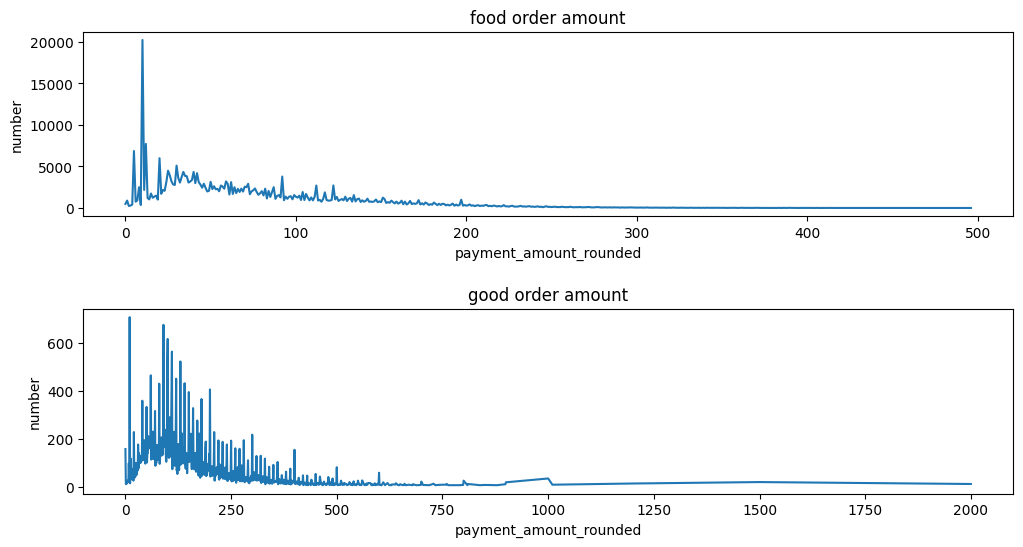

<Figure size 1000x600 with 0 Axes>

,payment_amount_rounded,store_segment,number
440,496.0,FOOD,6
439,481.0,FOOD,10
438,474.0,FOOD,7
437,472.0,FOOD,8
436,468.0,FOOD,7


In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

good_p = amount.filter(amount['store_segment'] == 'GOOD')
good = good_p.toPandas()
food_p = amount.filter(amount['store_segment'] == 'FOOD')
food = food_p.toPandas()

fig, axs = plt.subplots(2, 1, figsize=(12, 6), gridspec_kw={'hspace':0.5})
plt.figure(figsize=(10,6))
sns.lineplot(data = food, x='payment_amount_rounded', y='number', ax=axs[0])
sns.lineplot(data = good, x='payment_amount_rounded', y='number', ax=axs[1])
axs[0].set_title('food order amount')
axs[1].set_title('good order amount')
plt.show()
food.sort_values(by='payment_amount_rounded', ascending=False).head()

In [ ]:
amount = amount.filter(amount['number'] > 5)
paym_to_p = amount.toPandas()

In [ ]:
spark.stop()